<a href="https://colab.research.google.com/github/anvitha-jain/MLColab/blob/master/CrimeRate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Anvitha Shubhaveer Jain :01378478**

Data set used:  https://drive.google.com/open?id=1d8hqHjlhE2F29fcQOZgKtA31c50VKuoW

Two algorithms used are: Affinity Propogation and DBScan Clustering

.

**Calulating crime rate**

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns   # for plot styling ; sns.set()
import numpy as np

from scipy.spatial.distance import cdist
import pylab as pl

In [0]:
from google.colab import drive  #to mount the data from drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
crime = pd.read_csv('drive/My Drive/crimeData.csv')
crime.head() #display first 5 rows of the data

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,1/29/16 0:00,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.200000e+13
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,1/29/16 0:00,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.200000e+13
2,141059263,WARRANTS,WARRANT ARREST,Monday,4/25/16 0:00,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",1.410000e+13
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,1/5/16 0:00,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",1.600000e+13
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,1/1/16 0:00,0:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",1.600000e+13


In [0]:
crime.count()

IncidntNum    150500
Category      150500
Descript      150500
DayOfWeek     150500
Date          150500
Time          150500
PdDistrict    150499
Resolution    150500
Address       150500
X             150500
Y             150500
Location      150500
PdId          150500
dtype: int64

In [0]:
# describing the data

crime.describe()

,IncidntNum,X,Y,PdId
count,1.505000e+05,150500.000000,150500.000000,1.505000e+05
mean,1.616440e+08,-122.423599,37.768921,1.616152e+13
std,5.535976e+06,0.026210,0.023637,5.523506e+11
min,1.135121e+07,-122.513642,37.707922,1.140000e+12
25%,1.603283e+08,-122.434036,37.756486,1.600000e+13
50%,1.606541e+08,-122.416903,37.775421,1.610000e+13
75%,1.609764e+08,-122.406605,37.785063,1.610000e+13
max,9.910090e+08,-122.365565,37.819975,9.910000e+13


### **Data Visualization**

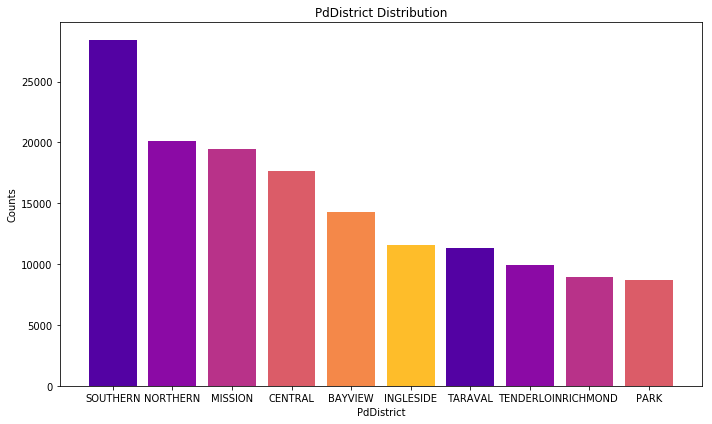

In [0]:
plt.figure(figsize=(10,6))
plt.bar(crime['PdDistrict'].value_counts().index, 
        crime['PdDistrict'].value_counts(),
        color=sns.color_palette('plasma'))
plt.xlabel('PdDistrict')
plt.ylabel('Counts')
plt.title('PdDistrict Distribution')
plt.tight_layout()

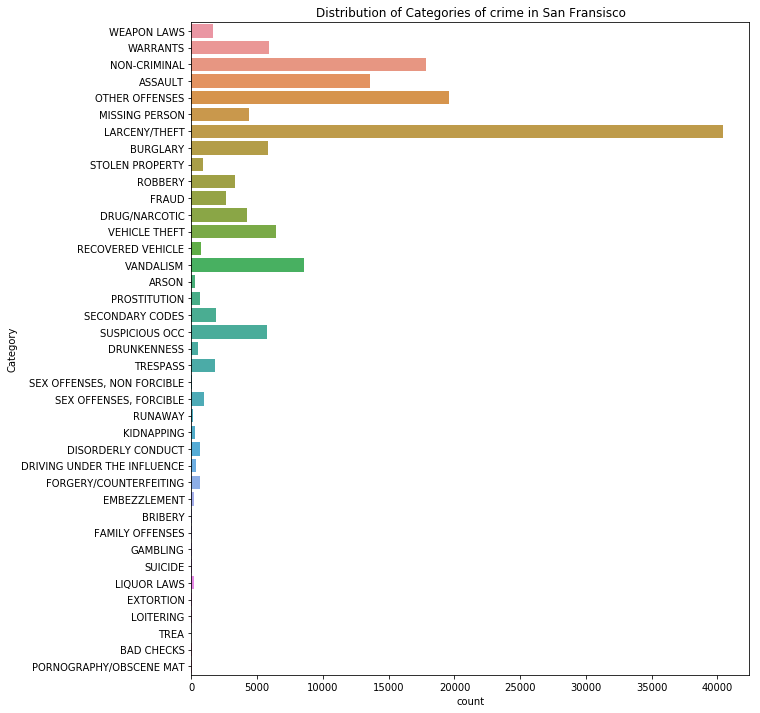

In [0]:
plt.figure(figsize=(10,12))
plt.title('Distribution of Categories of crime in San Fransisco')
sns.countplot(y=crime['Category'])

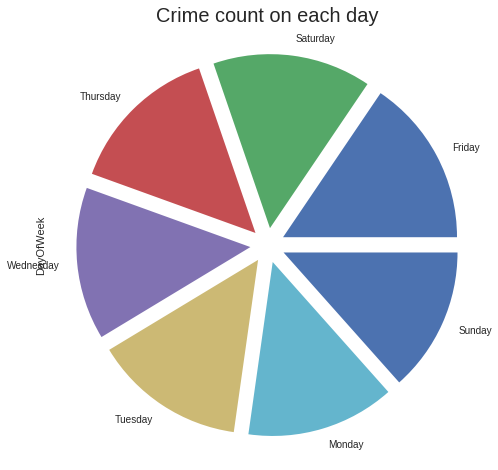

In [0]:
# Days with count of crimes

plt.style.use('seaborn')


crime['DayOfWeek'].value_counts().head(15).plot.pie(figsize = (15, 8), explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))

plt.title('Crime count on each day',fontsize = 20)

plt.xticks(rotation = 90)
plt.show()


### **Data Preprocessing**

In [0]:
def null_check(df,name): #null values check
    print(name)
    print('Number of rows and cols are {} and {}'.format(df.shape[0],
            df.shape[1]))
    print('Number of nulls are \n{}'.format(df.isnull().sum()),'\n')
    

null_check(crime,'crimeData')

crimeData
Number of rows and cols are 150500 and 13
Number of nulls are 
IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    1
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
dtype: int64 



In [0]:
def missing_data(data):  #missing values check
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [0]:
missing_data(crime)

,Total,Percent
PdDistrict,1,0.000664
PdId,0,0.000000
Location,0,0.000000
Y,0,0.000000
X,0,0.000000
Address,0,0.000000
Resolution,0,0.000000
Time,0,0.000000
Date,0,0.000000
DayOfWeek,0,0.000000


In [0]:
# filling the missing value in PdDistrict using the mode values

crime['PdDistrict'].fillna(crime['PdDistrict'].mode()[0], inplace = True)

crime.isnull().any().any()

False

In [0]:
crime['Category'].value_counts().head(n = 39)

LARCENY/THEFT                  40409
OTHER OFFENSES                 19599
NON-CRIMINAL                   17866
ASSAULT                        13577
VANDALISM                       8589
VEHICLE THEFT                   6419
WARRANTS                        5914
BURGLARY                        5802
SUSPICIOUS OCC                  5782
MISSING PERSON                  4338
DRUG/NARCOTIC                   4243
ROBBERY                         3299
FRAUD                           2635
SECONDARY CODES                 1841
TRESPASS                        1812
WEAPON LAWS                     1658
SEX OFFENSES, FORCIBLE           940
STOLEN PROPERTY                  882
RECOVERED VEHICLE                736
DISORDERLY CONDUCT               658
PROSTITUTION                     641
FORGERY/COUNTERFEITING           619
DRUNKENNESS                      465
DRIVING UNDER THE INFLUENCE      378
ARSON                            286
KIDNAPPING                       257
EMBEZZLEMENT                     168
L

In [0]:
crime['Category']= crime['Category'].map({'LARCENY/THEFT ':0,'OTHER OFFENSES':1,'NON-CRIMINAL  ':2,'ASSAULT ':3,'VANDALISM ':4,'VEHICLE THEFT ':5,
                                          'WARRANTS ':6,'BURGLARY  ':7,'SUSPICIOUS OCC ':8,'MISSING PERSON ':9,'DRUG/NARCOTIC  ':10,
                                          'ROBBERY ':11,'FRAUD ':12,'SECONDARY CODES ':13,'TRESPASS ':14,'WEAPON LAWS ':15,'SEX OFFENSES, FORCIBLE ':16,
                                          'STOLEN PROPERTY ':17,'RECOVERED VEHICLE ':18,'DISORDERLY CONDUCT':19,'PROSTITUTION ':20,'FORGERY/COUNTERFEITING ':21,'DRUNKENNESS ':22,
                                          'DRIVING UNDER THE INFLUENCE ':23,'ARSON ':24,'KIDNAPPING ':25,'EMBEZZLEMENT ':26,'LIQUOR LAWS ':27,'RUNAWAY ':28,
                                          'SUICIDE ':29,'BRIBERY ':30,'EXTORTION ':31,'FAMILY OFFENSES ':32,'LOITERING ':33,'SEX OFFENSES, NON FORCIBLE ':34,
                                          'BAD CHECKS ':35,'GAMBLING ':36,'PORNOGRAPHY/OBSCENE MAT ':37,'LTREA ':38})

In [0]:
crime['DayOfWeek'].value_counts().head(n = 10)

Friday       23371
Saturday     22172
Thursday     21395
Wednesday    21332
Tuesday      21242
Monday       20783
Sunday       20205
Name: DayOfWeek, dtype: int64

In [0]:
crime['DayOfWeek']= crime['DayOfWeek'].map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})

In [0]:
X = crime.drop('Location', axis = 1)
X = crime.drop('Category', axis = 1)

# Handling the missing values 
X.fillna(method ='ffill', inplace = True) 
  
print(X.head()) 

   IncidntNum  ...          PdId
0   120058272  ...  1.200000e+13
1   120058272  ...  1.200000e+13
2   141059263  ...  1.410000e+13
3   160013662  ...  1.600000e+13
4   160002740  ...  1.600000e+13

[5 rows x 12 columns]


## **Calculation of Elbow Curve**

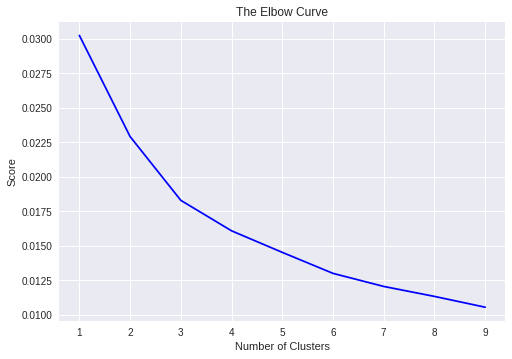

In [0]:
lat_x=np.array(crime['X'].values) 
long_y=np.array(crime['Y'].values)
# Elbow method to caculte k
# Euclidean distance metric is used.
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
crime_data = np.array(list(zip(lat_x, long_y)))

inertia = []
distortion = []
map1 = {}
map2 = {}

Krange = range(1, 10) # define number of clusters range, can't be 0 because there is no 0 clustering
for i in Krange:
  # build, fit the model
  kmeanModel = KMeans(n_clusters=i).fit(crime_data)
  kmeanModel.fit(crime_data)
  
  distortion.append(sum(np.min(cdist(crime_data, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / crime_data.shape[0]) 
  inertia.append(kmeanModel.inertia_) 
  
  map1[i] = sum(np.min(cdist(crime_data, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / crime_data.shape[0] 
  map2[i] = kmeanModel.inertia_
  
  
plt.plot(Krange, distortion, 'bx-') 
plt.xlabel('Number of Clusters') 
plt.ylabel('Score') 
plt.title('The Elbow Curve') 
plt.show() 

### **Affinity Propagation Clustering**

.

In [0]:
crime= crime.sample(frac=1)

In [0]:
crime = crime.drop(crime.index[25000:150501])

In [0]:
crime.count()

IncidntNum    25000
Category       3347
Descript      25000
DayOfWeek     25000
Date          25000
Time          25000
PdDistrict    25000
Resolution    25000
Address       25000
X             25000
Y             25000
Location      25000
PdId          25000
dtype: int64

.

In [0]:
from sklearn.cluster import AffinityPropagation 
from sklearn import metrics 
from sklearn.datasets.samples_generator import make_blobs 

crimeRate=crime[['X','Y']]

# Generate sample data 
centers = crimeRate
X, labels_true = make_blobs(n_samples = 75, centers = centers, 
						cluster_std = 1.5, random_state = 0) 

# Compute Affinity Propagation 
af = AffinityPropagation(preference =-50).fit(X) 
cluster_centers_indices = af.cluster_centers_indices_ 
labels = af.labels_ 

n_clusters_ = len(cluster_centers_indices)

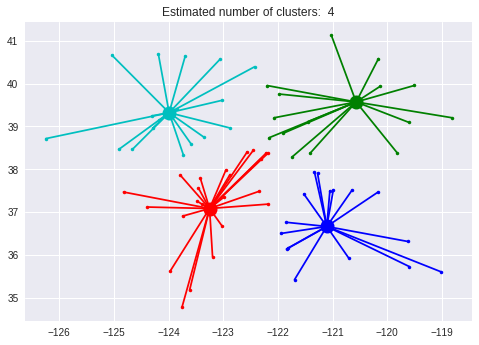

In [0]:
# Plot result 
import matplotlib.pyplot as plt 
from itertools import cycle 

plt.close('all') 
plt.figure(1) 
plt.clf() 

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk') 

for k, col in zip(range(n_clusters_), colors): 
	class_members = labels == k 
	cluster_center = X[cluster_centers_indices[k]] 
	plt.plot(X[class_members, 0], X[class_members, 1], col + '.') 
	plt.plot(cluster_center[0], cluster_center[1], 'o', 
			markerfacecolor = col, markeredgecolor ='k', 
			markersize = 14) 

	for x in X[class_members]: 
		plt.plot([cluster_center[0], x[0]], 
				[cluster_center[1], x[1]], col) 

plt.title('Estimated number of clusters: % d' % n_clusters_) 
plt.show()

### **DBScan ALgo**

In [0]:
print(__doc__)

import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

Automatically created module for IPython interactive environment


In [0]:
crime = pd.read_csv('drive/My Drive/crimeData.csv')
lat_x=np.array(crime['X'].values) 
long_y=np.array(crime['Y'].values)

X = np.array(list(zip(lat_x, long_y)))


In [0]:
X, labels_true = make_blobs(n_samples=10000, centers=3, cluster_std=0.4, random_state=0)# 

X = StandardScaler().fit_transform(X)


In [0]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [0]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels,
                                           average_method='arithmetic'))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 2
Estimated number of noise points: 2
Homogeneity: 0.579
Completeness: 0.997
V-measure: 0.733
Adjusted Rand Index: 0.571
Adjusted Mutual Information: 0.733
Silhouette Coefficient: 0.562


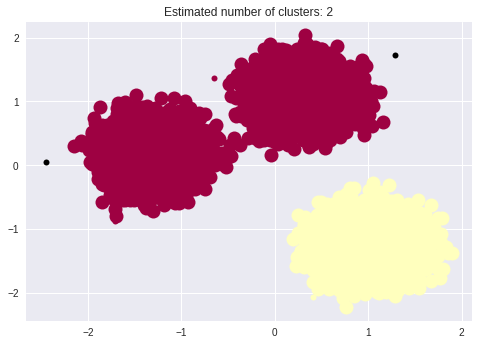

In [0]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### **Tensorflow of K-means Algorithm**

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

points_n = 5000
clusters_n = 3
iteration_n = 100
points = tf.constant(np.random.uniform(list(zip(lat_x, long_y)), (points_n, 2)))


centroids = tf.Variable(tf.slice(tf.random_shuffle(points), [0, 0], [clusters_n, -1]))

points_expanded = tf.expand_dims(points, 0)
centroids_expanded = tf.expand_dims(centroids, 1)

distances = tf.reduce_sum(tf.square(tf.subtract(points_expanded, centroids_expanded)), 2)
assignments = tf.argmin(distances, 0)

means = []
for c in range(clusters_n):
    means.append(tf.reduce_mean(
      tf.gather(points, 
                tf.reshape(
                  tf.where(
                    tf.equal(assignments, c)
                  ),[1,-1])
               ),reduction_indices=[1]))

new_centroids = tf.concat(means, 0)

update_centroids = tf.assign(centroids, new_centroids)
init = tf.global_variables_initializer()

with tf.Session() as sess:
  sess.run(init)
  for step in range(iteration_n):
    [_, centroid_values, points_values, assignment_values] = sess.run([update_centroids, centroids, points, assignments])
    
  print("centroids", centroid_values)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
centroids [[4145.5660462    19.76835424]
 [ 732.48649346   19.8350158 ]
 [2445.83997919   19.8273179 ]]




---





> # **ASSIGNMENT - 2**



---



.

### **Data Visualization and modification based on Use Case**

In [0]:
import plotly.graph_objects as go
import random
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import warnings
%matplotlib inline
import sklearn.cluster.k_means_
from sklearn import mixture
import seaborn as sns
from pandas import ExcelWriter

In [0]:
df = pd.read_csv('drive/My Drive/crimeData.csv')
df.head(2)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,1/29/16 0:00,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.200000e+13
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,1/29/16 0:00,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.200000e+13


In [0]:
ctg = df['Category'].unique().tolist()
mapping = dict( zip(ctg,range(len(ctg))) )
print(ctg)
print(mapping)
df.replace({'ctg': mapping},inplace=True)

ctg = []
for row in df['Category']:
    try:
        ctg.append(mapping[row])
    except:
        ctg.append(np.NaN)
df['Category'] = ctg
print(df['Category'])

['WEAPON LAWS', 'WARRANTS', 'NON-CRIMINAL', 'ASSAULT', 'OTHER OFFENSES', 'MISSING PERSON', 'LARCENY/THEFT', 'BURGLARY', 'STOLEN PROPERTY', 'ROBBERY', 'FRAUD', 'DRUG/NARCOTIC', 'VEHICLE THEFT', 'RECOVERED VEHICLE', 'VANDALISM', 'ARSON', 'PROSTITUTION', 'SECONDARY CODES', 'SUSPICIOUS OCC', 'DRUNKENNESS', 'TRESPASS', 'SEX OFFENSES, NON FORCIBLE', 'SEX OFFENSES, FORCIBLE', 'RUNAWAY', 'KIDNAPPING', 'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE', 'FORGERY/COUNTERFEITING', 'EMBEZZLEMENT', 'BRIBERY', 'FAMILY OFFENSES', 'GAMBLING', 'SUICIDE', 'LIQUOR LAWS', 'EXTORTION', 'LOITERING', 'TREA', 'BAD CHECKS', 'PORNOGRAPHY/OBSCENE MAT']
{'WEAPON LAWS': 0, 'WARRANTS': 1, 'NON-CRIMINAL': 2, 'ASSAULT': 3, 'OTHER OFFENSES': 4, 'MISSING PERSON': 5, 'LARCENY/THEFT': 6, 'BURGLARY': 7, 'STOLEN PROPERTY': 8, 'ROBBERY': 9, 'FRAUD': 10, 'DRUG/NARCOTIC': 11, 'VEHICLE THEFT': 12, 'RECOVERED VEHICLE': 13, 'VANDALISM': 14, 'ARSON': 15, 'PROSTITUTION': 16, 'SECONDARY CODES': 17, 'SUSPICIOUS OCC': 18, 'DRUNKENNE

In [0]:
DayOfWeek = df['DayOfWeek'].unique().tolist()
# print(df['DayOfWeek'])
mapping = dict( zip(DayOfWeek,range(len(DayOfWeek))) )
print(mapping)

#df.replace({'DayOfWeek': mapping},inplace=True)
df.DayOfWeek.map(mapping)

DayOfWeek = []
for row in df['DayOfWeek']:
    try:
        DayOfWeek.append(mapping[row])
    except:
        DayOfWeek.append(np.NaN)
df['DayOfWeek'] = DayOfWeek
print(df['DayOfWeek'])

{'Friday': 0, 'Monday': 1, 'Tuesday': 2, 'Saturday': 3, 'Thursday': 4, 'Sunday': 5, 'Wednesday': 6}
0         0
1         0
2         1
3         2
4         0
5         0
6         3
7         3
8         3
9         0
10        0
11        3
12        1
13        4
14        3
15        3
16        3
17        3
18        3
19        3
20        3
21        5
22        5
23        5
24        5
25        5
26        5
27        5
28        5
29        5
         ..
150470    3
150471    5
150472    3
150473    3
150474    1
150475    1
150476    2
150477    1
150478    5
150479    0
150480    1
150481    1
150482    1
150483    3
150484    2
150485    1
150486    2
150487    5
150488    1
150489    5
150490    2
150491    5
150492    5
150493    0
150494    4
150495    0
150496    0
150497    4
150498    0
150499    0
Name: DayOfWeek, Length: 150500, dtype: int64


In [0]:
PdDistrict = df['PdDistrict'].unique().tolist()
# print(df['PdDistrict'])
mapping = dict( zip(PdDistrict,range(len(PdDistrict))) )
print(mapping)

#df.replace({'PdDistrict': mapping},inplace=True)
df.PdDistrict.map(mapping)

PdDistrict = []
for row in df['PdDistrict']:
    try:
        PdDistrict.append(mapping[row])
    except:
        PdDistrict.append(np.NaN)
df['PdDistrict'] = PdDistrict
print(df['PdDistrict'])

{'SOUTHERN': 0, 'BAYVIEW': 1, 'TENDERLOIN': 2, 'MISSION': 3, 'NORTHERN': 4, 'TARAVAL': 5, 'INGLESIDE': 6, 'CENTRAL': 7, 'RICHMOND': 8, 'PARK': 9, nan: 10}
0         0
1         0
2         1
3         2
4         3
5         4
6         0
7         2
8         0
9         1
10        5
11        5
12        1
13        6
14        7
15        0
16        3
17        3
18        6
19        0
20        4
21        4
22        3
23        3
24        8
25        5
26        3
27        4
28        3
29        6
         ..
150470    4
150471    8
150472    0
150473    7
150474    0
150475    7
150476    0
150477    7
150478    0
150479    9
150480    7
150481    5
150482    5
150483    2
150484    0
150485    0
150486    7
150487    5
150488    3
150489    0
150490    1
150491    0
150492    3
150493    3
150494    1
150495    9
150496    7
150497    7
150498    7
150499    0
Name: PdDistrict, Length: 150500, dtype: int64


In [0]:
Location = df['Location'].unique().tolist()
# print(df['Location'])
mapping = dict( zip(Location,range(len(Location))) )
print(mapping)

#df.replace({'Location': mapping},inplace=True)
df.Location.map(mapping)

Location = []
for row in df['Location']:
    try:
        Location.append(mapping[row])
    except:
        Location.append(np.NaN)
df['Location'] = Location
print(df['Location'])

{'(37.775420706711, -122.403404791479)': 0, '(37.7299809672996, -122.388856204292)': 1, '(37.7857883766888, -122.412970537591)': 2, '(37.7650501214668, -122.419671780296)': 3, '(37.788018555829, -122.426077177375)': 4, '(37.7808789360214, -122.405721454567)': 5, '(37.7839805592634, -122.411778295992)': 6, '(37.7757876218293, -122.393357241451)': 7, '(37.7209669615499, -122.387181635995)': 8, '(37.7644781578695, -122.477376524003)': 9, '(37.7457389429655, -122.477960327299)': 10, '(37.7356970275482, -122.37675765553)': 11, '(37.7292705199592, -122.432325871028)': 12, '(37.791642982384, -122.40090869889)': 13, '(37.7837069301545, -122.408595110869)': 14, '(37.7572895904578, -122.406870402082)': 15, '(37.7489063051829, -122.420354780861)': 16, '(37.715765426995, -122.439909766772)': 17, '(37.7835699386918, -122.408421116922)': 18, '(37.7736186276456, -122.422315670749)': 19, '(37.7928412840447, -122.424519835009)': 20, '(37.7540986882068, -122.414233849038)': 21, '(37.7714939969416, -122.

Finding the corelation between the data to select vadiables.

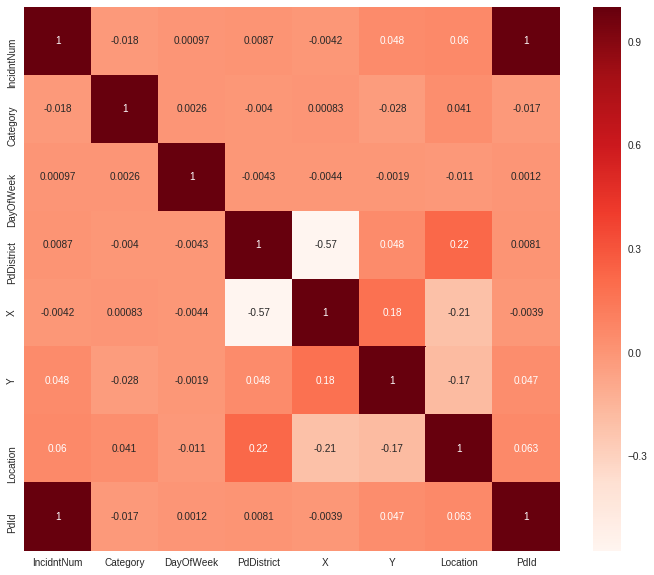

In [0]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [0]:
#Correlation with output variable
cor_target = abs(cor)
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

,IncidntNum,Category,DayOfWeek,PdDistrict,X,Y,Location,PdId
IncidntNum,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,0.99887
Category,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
DayOfWeek,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
PdDistrict,NaN,NaN,NaN,1.00000,0.57311,NaN,NaN,NaN
X,NaN,NaN,NaN,0.57311,1.00000,NaN,NaN,NaN
Y,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Location,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
PdId,0.99887,NaN,NaN,NaN,NaN,NaN,NaN,1.00000


In [0]:
# check for null values

df.isnull().sum()

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
dtype: int64

In [0]:
lat = []
lon = []
for row in df['Location']:
    try:
        lat.append(row.split(',')[0].strip('('))
        lon.append(row.split(',')[1].strip(')'))
    except:
        lat.append(np.NaN)
        lon.append(np.NaN)
df['X'] = lat
df['Y'] = lon
df.head(3)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,0,POSS OF PROHIBITED WEAPON,0,1/29/16 0:00,11:00,0,"ARREST, BOOKED",800 Block of BRYANT ST,NaN,NaN,0,1.200000e+13
1,120058272,0,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",0,1/29/16 0:00,11:00,0,"ARREST, BOOKED",800 Block of BRYANT ST,NaN,NaN,0,1.200000e+13
2,141059263,1,WARRANT ARREST,1,4/25/16 0:00,14:59,1,"ARREST, BOOKED",KEITH ST / SHAFTER AV,NaN,NaN,1,1.410000e+13


Determination of k using Elbow Curve

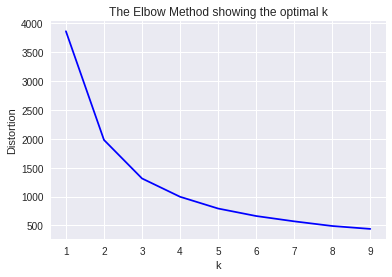

In [0]:
# ELbow Cure
X = np.array(list(zip(df.loc[:,'Category'],df.loc[:,'Location'])))

# k means determine k
distortions=[]
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

THe value of k from the above is 3.

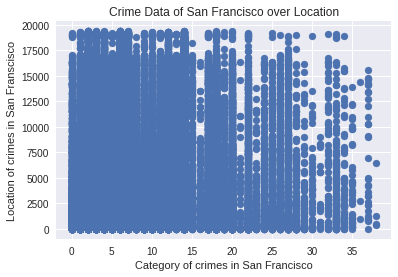

In [0]:
# scatter plot
x=np.array(df['Category'].values) 
y=np.array(df['Location'].values)

plt.title('Crime Data of San Francisco over Location')
plt.xlabel('Category of crimes in San Francisco')
plt.ylabel('Location of crimes in San Franscisco')
plt.scatter(x, y)
plt.show()

## **KMM algo**

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

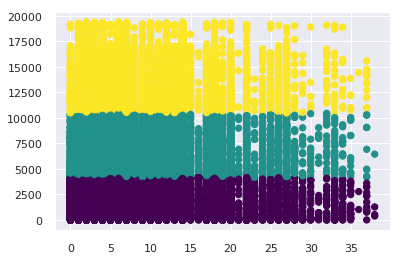

In [0]:
# Plot the data with K Means Labels
from sklearn.cluster import KMeans
kmeans = KMeans(3, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [0]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, crime_data, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

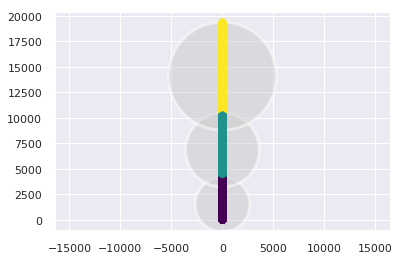

In [0]:
kmeans = KMeans(n_clusters=3, random_state=0)
plot_kmeans(kmeans, X)

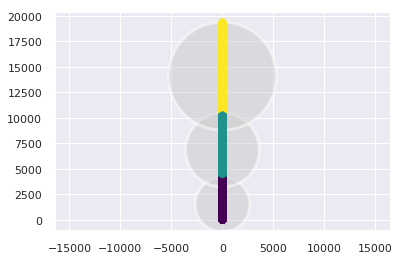

In [0]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=3, random_state=0)
plot_kmeans(kmeans, X_stretched)

.




.






> # **GMM**



In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

from scipy.spatial.distance import cdist
import pylab as pl

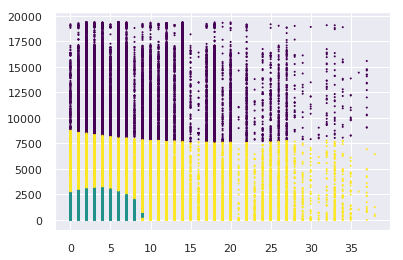

In [0]:
# https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm.html
# https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
# GMM 


from sklearn.mixture import GaussianMixture
x=np.array(df['Category'].values) 
y=np.array(df['Location'].values)
X=np.array(list(zip(df.loc[:,'Category'],df.loc[:,'Location'])))
gmm_sklearn = GaussianMixture(n_components = 3)
gmm_sklearn.fit(X)
labels = gmm_sklearn.predict(X)
plt.scatter(x, y, c=labels, s=1, cmap='viridis') 

In [0]:
probs = gmm_sklearn.predict_proba(X)
print(probs[:5].round(3))

[[0.002 0.933 0.065]
 [0.002 0.933 0.065]
 [0.001 0.962 0.037]
 [0.001 0.974 0.025]
 [0.001 0.974 0.025]]


**The Uncertainty Emphasis**

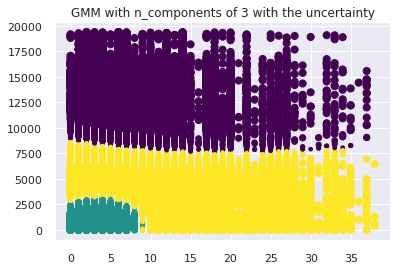

In [0]:
size = 50 * probs.max(1) ** 2 # squared is for the uncertainty, emphasizes the differences
plt.title('GMM with n_components of 3 with the uncertainty')
plt.scatter(X[:,0], X[:,1], c=labels, s=size, cmap='viridis');

**Drawing Funciton of Ellipsoids for GMM**

In [0]:
# draw ellipsoids
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)



**GMM + Spherical covariance**

TypeError: ignored

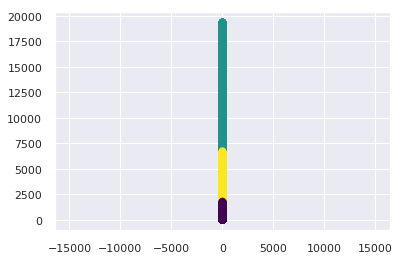

In [0]:
gmm = GaussianMixture(n_components=3, covariance_type='spherical').fit(X) # spherical
plot_gmm(gmm, X)

**GMM + Full Covariance**



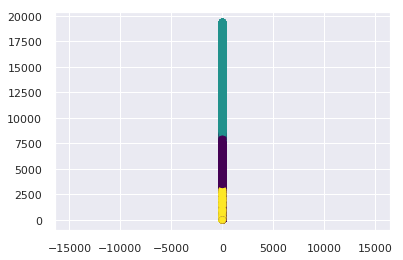

In [0]:
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(X)
plot_gmm(gmm, X)

**GMM + Tied Covariance**

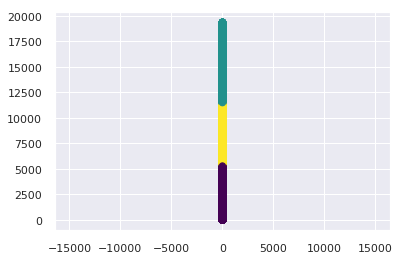

In [0]:
gmm = GaussianMixture(n_components=3, covariance_type='tied').fit(X)
plot_gmm(gmm, X)

**GMM + Diagonal Covariance**

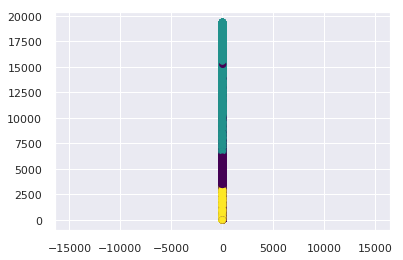

In [0]:
gmm = GaussianMixture(n_components=3, covariance_type='diag').fit(X)
plot_gmm(gmm, X)

.



---



# **Data Narrative:**

.


**Usecase:** 
Predicting the real estate value an area based on the crime rate in that particualr area in San Francisco

**New Insight:**
Considering both the clustering I conclude that the data is insufficient to solve the use case.

But with the use of K-means and GMM clustering we can see that the certain  type of crime is occuring at only particular locations. We can use these location area(districts) to monitor the real estate pricing algon certain period of time. By monitoring these data we can predict the price changes in real estate based on crime rate. We can also avoid the increase in crime rate with the use of other factors affecting the crime rate modulation.